#### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#### Business Goal 

Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Step 1 : Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')


In [2]:
leads = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Step 2:  Inspect Data

In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
categorical_columns = leads.select_dtypes(include=['object']).columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Missing Values

missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Check duplicates

leads[leads.duplicated (keep=False)]

# No Plulicate values found

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


####  We need to do Missing value treatment, Categorical data encoding and Convert 'Select' to NaN as this is as good as Nan where the user did not select any option

In [9]:
# Changing Select to Nan
leads = leads.replace('Select', np.nan)

In [10]:
missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Step 3: Encoding the variables with Yes/No labels with 1/0

In [11]:
for feature in ['Do Not Email', 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
                'I agree to pay the amount through cheque','A free copy of Mastering The Interview']:
    
    leads[feature]=leads[feature].apply(lambda x: 1 if x=='Yes' else 0)
    

In [12]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened


In [13]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,14.306252,16.344883,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,1.386694,1.811395,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,11.000000,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,15.000000,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,16.000000,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.000000,18.000000,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,20.000000,0.0,1.000000


In [14]:
# Checking the remaining categorical variable

leads.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9204 non-null   object
 3   Last Activity                                  9137 non-null   object
 4   Country                                        6779 non-null   object
 5   Specialization                                 5860 non-null   object
 6   How did you hear about X Education             1990 non-null   object
 7   What is your current occupation                6550 non-null   object
 8   What matters most to you in choosing a course  6531 non-null   object
 9   Tags                                           5887 non-null   

In [15]:
# checking lables of the categorical columns

for col in leads.iloc[:,1:].select_dtypes(include='object').columns:
    print(col)
    print("******************************************")
    print(leads[col].value_counts(normalize= True))
    print("******************************************")

Lead Origin
******************************************
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
******************************************
Lead Source
******************************************
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Nam

In [16]:
leads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,5022.000000,5022.000000,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,14.306252,16.344883,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,1.386694,1.811395,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,7.000000,11.000000,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,15.000000,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.000000,16.000000,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,15.000000,18.000000,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,18.000000,20.000000,0.0,1.000000


#### Step 4: Handling Missing values

- Dropping columns having more than 30% missing values 

In [17]:
leads = leads.drop(leads.loc[:,list(round(leads.isnull().sum()/leads.shape[0],2)>0.3)].columns, 1)

In [18]:
missing_percent = round(leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

- Dropping the rows for rest of the missing values whichis is less 1.5%

In [19]:
leads.dropna(inplace=True)

In [20]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified


In [21]:
missing_percent = round(100*leads.isnull().sum()/leads.shape[0],2)
missing_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

#### Step 5: Exploratory Data Analysis 

In [22]:
# Checking the Target variable for data imbalance

leads['Converted'].value_counts(normalize=True)

0    0.557766
1    0.442234
Name: Converted, dtype: float64

- The data shows good representation of both Converted and Non-converted and hence we are good to go.

#### Plotting different features Vs Converted to understand the Conversion rate and impact 

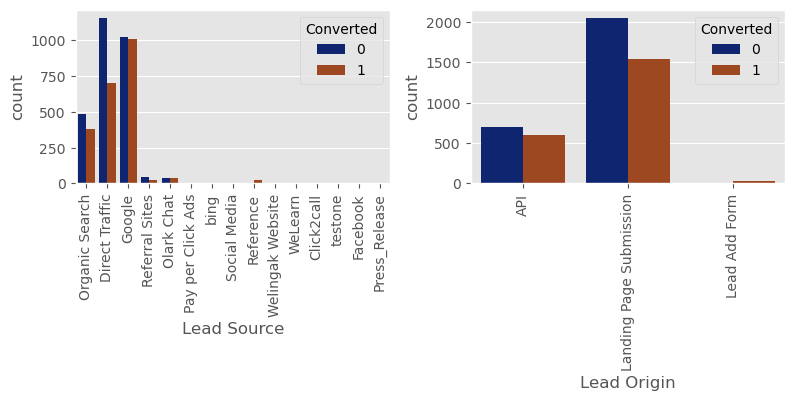

In [23]:
fig = plt.subplots(figsize = (12,10))
for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3,3,i+1)
    sns.countplot(x=leads[feature],hue= leads['Converted'],palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- Lead Source:-
- Google Search and Direct Traffic has highest lead counts followed by Olark Chat and Organic Search
- The Conversion rate is higher for Reference and Welingak Website 
- Lead Origin:-
- API and Landing page Submission has the maximum count of leads with low conversion rate
- Lead Add Forms have low count of leads but high conversion rate
- Lead Import and low count as well as conversion

#### To improve overall conversion rate we need to increase conversion rate of Google Search , Direct Traffic, API and Landing page Submission.
#### Also we need to increase the lead count for Reference, Welingak Website and Lead Add Forms

In [24]:
# Lead Source has many sources with neglible count of leads. We can club them togther in one sourse Other_Sources

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'],'Other_Sources')
leads['Lead Source'] = leads['Lead Source'].replace(['google'],'Google')

In [25]:
leads['Lead Source'].value_counts()

Google              2028
Direct Traffic      1856
Organic Search       860
Olark Chat            73
Referral Sites        71
Reference             21
Other_Sources         10
Welingak Website       5
Facebook               1
Name: Lead Source, dtype: int64

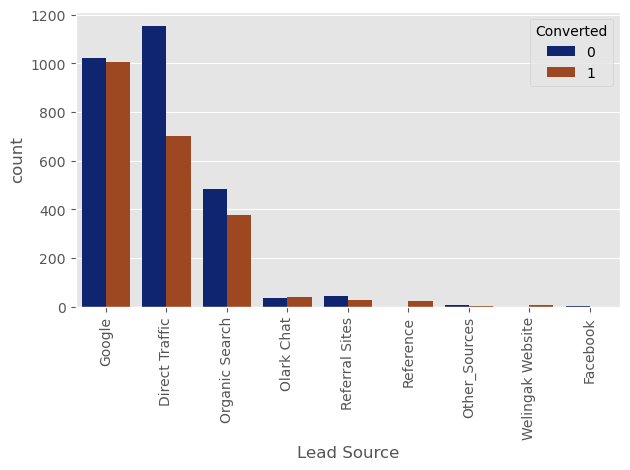

In [26]:
# Plotting Lead Source 
sns.countplot(x='Lead Source',hue= 'Converted',data = leads , palette='dark',order=leads['Lead Source'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

In [27]:
# Analyzing Total Visits , Total Time Spent on Website

print(leads['TotalVisits'].value_counts())
print(leads['Total Time Spent on Website'].value_counts())

2.0      1208
3.0       917
4.0       808
5.0       570
6.0       332
1.0       234
7.0       221
8.0       161
9.0       125
10.0       75
11.0       68
13.0       39
12.0       31
14.0       28
15.0       14
16.0       13
18.0       12
17.0       12
20.0       10
19.0        6
0.0         5
27.0        5
23.0        5
21.0        5
24.0        3
22.0        3
25.0        3
29.0        2
26.0        2
55.0        1
30.0        1
43.0        1
74.0        1
251.0       1
32.0        1
28.0        1
42.0        1
Name: TotalVisits, dtype: int64
60      15
127     14
87      13
74      13
94      12
        ..
709      1
990      1
1035     1
840      1
1944     1
Name: Total Time Spent on Website, Length: 1607, dtype: int64


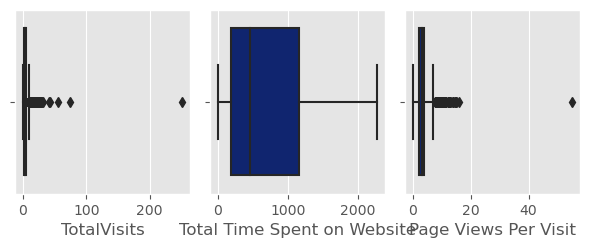

In [28]:
fig = plt.subplots(figsize = (6,7))
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=leads[feature],palette='dark')
    plt.tight_layout()

In [29]:
# There are many outliers in Total visits columns and we can cap this variable to 95 percentile , Also check 95th percentile of Page Views Per Visit
percentile = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits'] >=percentile] = percentile

percentile2 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >=percentile2] = percentile2

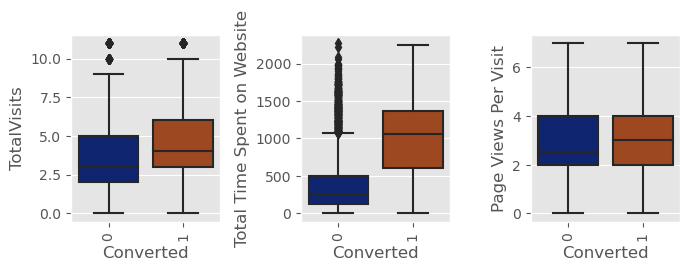

In [30]:
fig = plt.subplots(figsize = (7,7))
for i, feature in enumerate(['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']):
    plt.subplot(3,3,i+1)
    sns.boxplot(y= feature ,x= 'Converted',data = leads , palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- High TotalVisits and Page Views Per Visit create more conversion
- Users with more Time Spent on website are likely to be converted 

##### Website can be made more informative and appealing to increase the time user spends on website

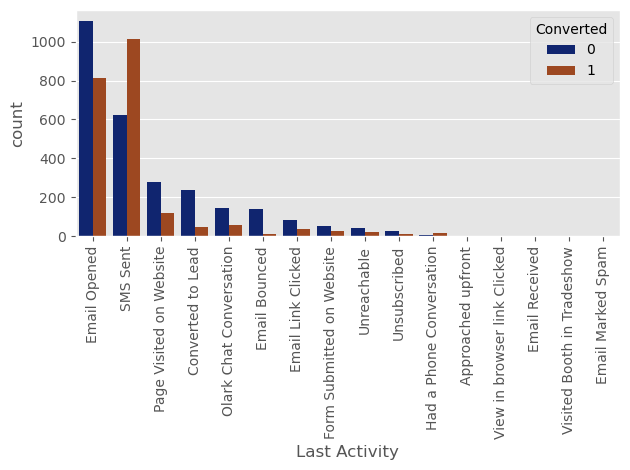

In [31]:
# Analyzing Last Activity
sns.countplot(x='Last Activity',hue= 'Converted',data = leads , palette='dark',order=leads['Last Activity'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

In [32]:
leads['Last Activity'].value_counts()

Email Opened                    1918
SMS Sent                        1634
Page Visited on Website          397
Converted to Lead                285
Olark Chat Conversation          203
Email Bounced                    152
Email Link Clicked               123
Form Submitted on Website         81
Unreachable                       65
Unsubscribed                      35
Had a Phone Conversation          22
Approached upfront                 3
View in browser link Clicked       3
Email Received                     2
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

In [33]:
# Converting Last Activity with negligible count (20 or less) to Others

leads['Last Activity'] = leads['Last Activity'].replace(['View in browser link Clicked', 'Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [34]:
leads['Last Activity'].value_counts()

Email Opened                 1918
SMS Sent                     1634
Page Visited on Website       397
Converted to Lead             285
Olark Chat Conversation       203
Email Bounced                 152
Email Link Clicked            123
Form Submitted on Website      81
Unreachable                    65
Unsubscribed                   35
Had a Phone Conversation       22
Others                         10
Name: Last Activity, dtype: int64

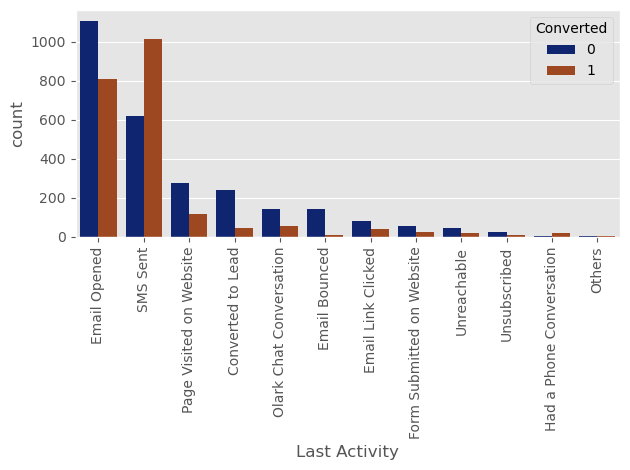

In [35]:
# Analyzing Last Activity
sns.countplot(x='Last Activity',hue= 'Converted',data = leads , palette='dark',order=leads['Last Activity'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.tight_layout()

- Count of leads in maximum for the Last Activity Email Opened
- Coversion is maximum for the Last Activity SMS Sent 

##### We should target to call more people with Last Activity as Email Opened and increase their convesrion rate and also increase the count of  users with last activity as SMS Sent 

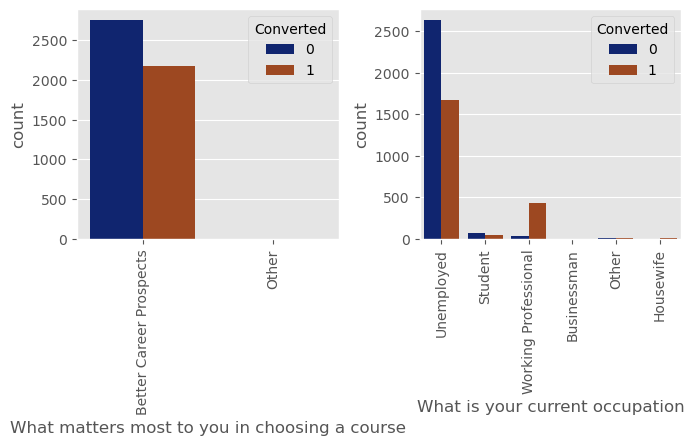

In [36]:
fig = plt.subplots(figsize = (7,7))
for i, feature in enumerate(['What matters most to you in choosing a course', 'What is your current occupation']):
    plt.subplot(2,2,i+1)
    sns.countplot(x= feature ,hue= 'Converted',data = leads , palette='dark')
    plt.xticks(rotation=90)
    plt.tight_layout()

- People who are looking for better career prospects have highest number of leads and conversion  
- Working Professionals have highest conversion
- Unemployed users create more leads


##### To increase overall conversion rate, we need to increase the number of leads for Working Professionals by reaching out to them more and also increasing conversion rate of leads of Unemployed users. 

- More than 95% of the Country is India. So these wont give much ineference.

In [37]:
    leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.873503
Working Professional    0.095431
Student                 0.025787
Other                   0.002843
Housewife               0.001421
Businessman             0.001015
Name: What is your current occupation, dtype: float64

In [38]:
# Renaming Other to Other_Occupation
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other'],'Other_Occupation')


In [39]:
    leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.873503
Working Professional    0.095431
Student                 0.025787
Other_Occupation        0.002843
Housewife               0.001421
Businessman             0.001015
Name: What is your current occupation, dtype: float64

In [40]:
# Analyzing other columns 

leads[["Do Not Email", "Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
         "Through Recommendations","Update me on Supply Chain Content","Get updates on DM Content"
         ,"I agree to pay the amount through cheque","A free copy of Mastering The Interview"]].describe()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,4925.000000,4925.000000,4925.000000,4925.0,4925.000000,4925.0,4925.000000,4925.000000,4925.000000,4925.0,4925.0,4925.0,4925.000000
mean,0.073909,0.000203,0.002030,0.0,0.000203,0.0,0.000203,0.000609,0.001218,0.0,0.0,0.0,0.437563
std,0.261649,0.014249,0.045019,0.0,0.014249,0.0,0.014249,0.024676,0.034886,0.0,0.0,0.0,0.496137
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [41]:
# Most of these have 0 or 1 in all columns and wont contribute much to the analysis. Hence unnecessary columns can be dropped. 
leads= leads.drop(['Do Not Email', 'Do Not Call','Lead Number','Search','Magazine','Newspaper Article','Country','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Update me on Supply Chain Content','Get updates on DM Content'
         ,'I agree to pay the amount through cheque','A free copy of Mastering The Interview','What matters most to you in choosing a course','Receive More Updates About Our Courses','Do Not Call'],1)

In [42]:
leads.head(2)

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Last Notable Activity
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Student,Email Opened


#### Step 6: Creating Dummy Variables

In [43]:
dummy = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']])
dummy.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
# Dropping original columns for which dummy is created
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],1)
leads.head(2)

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0


In [45]:
leads = pd.concat([leads,dummy],axis=1)
leads.head(2)

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


#### Step 7: Test_Train Split

In [46]:
# Assign Feature Variables to X and Target Variable to y 
X = leads.drop(['Prospect ID','Converted'],axis=1)
y = leads['Converted']

In [47]:
# Split Data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

#### Step 8: Feature Scaling

In [48]:
# Scaling features which are not 1 and 0 
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7442,-0.885426,1.701466,-0.686062,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6273,1.060795,-0.378271,2.520306,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Step 9: Analyzing Correlation

In [49]:
corr = leads.corr()
corr.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.133405,0.493151,0.046246,0.026987,-0.040689,0.083382,-0.101057,-0.012689,0.090670,0.019342,-0.003576,-0.003836,0.073491,-0.018516,0.035802,-0.138387,-0.132898,-0.040333,-0.031192,-0.031569,0.050706,-0.065343,0.023411,-0.084949,0.251271,-0.027746,-0.031529,0.022964,0.042370,0.013889,-0.010740,-0.282247,0.314682,0.016004,-0.047265,-0.026535,0.016004,-0.017491,0.016004,0.057775,-0.223163,-0.003869,-0.029378,0.263613,0.054469,-0.021817,-0.012689
TotalVisits,0.133405,1.000000,0.076446,0.569437,-0.087254,0.092329,-0.033915,-0.141542,-0.001615,-0.050157,0.013374,0.231035,-0.005111,-0.041131,0.060680,-0.011003,-0.229705,-0.110049,0.004494,0.048699,-0.028840,0.018296,0.002953,0.028007,0.176276,0.000819,0.006148,-0.003047,0.033345,-0.016771,0.036689,-0.017443,-0.022504,0.026758,0.003892,-0.021631,0.029362,0.020413,0.056123,0.009399,0.029344,-0.165267,0.032001,0.194865,0.009688,0.007441,-0.000974,0.020413
Total Time Spent on Website,0.493151,0.076446,1.000000,0.030064,0.014260,-0.017818,0.021940,-0.056623,-0.007416,0.071205,0.020481,-0.024686,-0.015907,0.015569,-0.011308,0.014054,-0.089659,-0.073555,-0.028226,-0.001892,-0.026762,0.015731,-0.031926,0.023920,-0.040025,0.133549,-0.030677,-0.022342,0.019262,0.006659,0.028139,-0.010428,-0.140048,0.156032,0.022345,-0.017659,-0.029417,0.030029,0.002803,0.002170,0.015464,-0.126641,0.017565,-0.009742,0.135224,0.004970,-0.006436,-0.015100
Page Views Per Visit,0.046246,0.569437,0.030064,1.000000,-0.175876,0.187532,-0.076927,-0.143087,0.008440,-0.025049,-0.096656,0.245433,-0.006405,-0.071885,0.050421,-0.030987,-0.208933,-0.092003,-0.014668,0.055136,-0.057055,-0.000705,-0.035481,0.018334,0.014689,0.093667,0.029654,0.025536,0.030279,-0.017229,0.015380,-0.024027,-0.006074,0.015973,0.017539,-0.035665,-0.006432,-0.003661,0.053415,-0.000659,0.004949,-0.124634,-0.022097,-0.044394,0.095563,0.018490,0.028750,-0.003661
Lead Origin_API,0.026987,-0.087254,0.014260,-0.175876,1.000000,-0.986081,-0.044462,-0.396309,-0.008534,0.218732,0.204825,0.122546,-0.006545,-0.039188,0.140125,-0.019091,0.029142,-0.040278,-0.007283,-0.019153,-0.015866,0.022056,0.204881,-0.006545,-0.030106,-0.041393,-0.000635,-0.017760,0.038769,-0.010365,0.011288,-0.013145,0.024178,-0.025181,-0.008534,0.003667,-0.023486,-0.008534,-0.032197,-0.008534,0.023060,0.078759,0.082892,-0.025418,-0.050107,0.024800,-0.019508,0.023797


In [50]:
# Top Correlations
top_corr = corr.unstack().sort_values(kind='quicksort',ascending=False)
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Last Activity_SMS Sent                  Last Notable Activity_SMS Sent                    0.897059
Lead Origin_Lead Add Form               Lead Source_Reference                             0.881377
Last Activity_Unsubscribed              Last Notable Activity_Unsubscribed                0.877592
Last Activity_Email Opened              Last Notable Activity_Email Opened                0.875416
Last Activity_Email Link Clicked        Last Notable Activity_Email Link Clicked          0.787449
Last Activity_Had a Phone Conversation  Last Notable Activity_Had a Phone Conversation    0.768002
Last Activity_Page Visited on Website   Last Notable Activity_Page Visited on Website     0.680206
TotalVisits                             Page Views Per Visit                              0.569437
Last Activity_Unreachable               Last Notable Activity_Unreachable                 0.523709
Last Activity_Email Bounced             Last Notable Activity_Email Bounced               0.500645
dtype: flo

In [51]:
leads.shape

(4925, 49)

In [52]:
# Check Conversion Rate 
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

44.22335025380711

In [53]:
categorical_columns =leads.select_dtypes(include=['object']).columns
categorical_columns

Index(['Prospect ID'], dtype='object')

#### Step 10: Building Model

In [54]:
# Logistic Regression Model 1

lr1 = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
lr1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3405
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jul 2023   Deviance:                       98274.
Time:                        19:53:03   Pearson chi2:                 4.81e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.445e+27   2.72e+19   5.32e+07      0.000    1.45e+27    1.45e+27
TotalVisits                                           8.022e+13   1.49e+06    5.4e+07      0.000    8.02e+13    8.02e+13
Total Time Spent on Website                           1.106e+13   1.19e+06    9.3e+06      0.000    1.11e+13    1.11e+13
Page Views Per Visit                                 -5.722e+13   1.48e+06  -3.88e+07      0.000   -5.72e+13   -5.72e+13
Lead Origin_API                                       5.525e+26   1.04e+19   5.32e+07      0.000    5.53e+26    5.53e+26
Lead Origin_Landing Page Submission                   5.525e+26   1.04e+19   5.32e+07      0.000    5.53e+26    5.53e+26
Lead Origin_Lead Add Form                             5.525e+26   1.04e+19   5.32e+07      0.000    5.53e+26    5.53e+26
Lead Source_Direct Traffic                            1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Facebook                                  1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Google                                    1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Olark Chat                                1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Organic Search                            1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Other_Sources                             1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Reference                                 1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Referral Sites                            1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Lead Source_Welingak Website                          1.891e+26   3.56e+18   5.32e+07      0.000    1.89e+26    1.89e+26
Last Activity_Converted to Lead                      -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Email Bounced                          -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Email Link Clicked                     -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Email Opened                           -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Form Submitted on Website              -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Had a Phone Conversation               -3.818e+26   7.18e+18  -5.32e+07      0.000   -3.82e+26   -3.82e+26
Last Activity_Olark Chat Conversation                -3.81

#### Step 11: Feature Selection Using RFE 

In [55]:
# Selecting 15 Features

logreg= LogisticRegression()
rfe = RFE(logreg,n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
       False, False])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Olark Chat', False, 21),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Other_Sources', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', False, 12),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 19),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 27),
 ('Last Activity_Others', True, 1),
 ('Last Ac

In [58]:
col = X_train.columns[rfe.support_]

In [59]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Sources',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other_Occupation',
       'Last Notable Activity_Approached upfront',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
    

#### Step 12: Assessing the model with StatsModels

In [60]:
# Logistic Regression Model 2

X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3431
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.6
Date:                Sun, 23 Jul 2023   Deviance:                       3203.2
Time:                        19:53:05   Pearson chi2:                 3.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3573
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1991      0.634      0.314      0.753      -1.043       1.441
Total Time Spent on Website                              1.1720      0.047     24.722      0.000       1.079       1.265
Lead Origin_Lead Add Form                               24.0497   3.41e+04      0.001      0.999   -6.67e+04    6.68e+04
Lead Source_Reference                                    0.0812   3.84e+04   2.11e-06      1.000   -7.53e+04    7.53e+04
Last Activity_Converted to Lead                         -0.8236      0.253     -3.255      0.001      -1.319      -0.328
Last Activity_Email Bounced                             -1.4781      0.385     -3.844      0.000      -2.232      -0.724
Last Activity_Had a Phone Conversation                   1.3872      1.059      1.310      0.190      -0.688       3.463
Last Activity_Others                                     1.4332      1.300      1.103      0.270      -1.114       3.980
Last Activity_SMS Sent                                   0.8194      0.094      8.717      0.000       0.635       1.004
What is your current occupation_Housewife               23.1177   2.71e+04      0.001      0.999   -5.31e+04    5.32e+04
What is your current occupation_Student                 -0.8680      0.689     -1.261      0.207      -2.218       0.482
What is your current occupation_Unemployed              -0.7637      0.635     -1.203      0.229      -2.008       0.480
What is your current occupation_Working Professional     2.0389      0.674      3.027      0.002       0.719       3.359
Last Notable Activity_Had a Phone Conversation          22.4090   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
Last Notable Activity_Modified                          -0.5777      0.109     -5.297      0.000      -0.791      -0.364
Last Notable Activity_Unreachable                        2.3723      0.852      2.786      0.005       0.703       4.041
========================================================================================================================
"""

In [61]:
# Removing feature Lead Source_Reference with P-Value 1.000

col = col.drop('Lead Source_Reference',1)

In [62]:
# Logistic Regression Model 3

X_train_sm = sm.add_constant(X_train[col])
lr3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3432
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.6
Date:                Sun, 23 Jul 2023   Deviance:                       3203.2
Time:                        19:53:05   Pearson chi2:                 3.54e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3573
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1991      0.634      0.314      0.753      -1.043       1.441
Total Time Spent on Website                              1.1720      0.047     24.722      0.000       1.079       1.265
Lead Origin_Lead Add Form                               24.0784   1.55e+04      0.002      0.999   -3.03e+04    3.04e+04
Last Activity_Converted to Lead                         -0.8236      0.253     -3.255      0.001      -1.319      -0.328
Last Activity_Email Bounced                             -1.4781      0.385     -3.844      0.000      -2.232      -0.724
Last Activity_Had a Phone Conversation                   1.3872      1.059      1.310      0.190      -0.688       3.463
Last Activity_Others                                     1.4332      1.300      1.103      0.270      -1.114       3.980
Last Activity_SMS Sent                                   0.8194      0.094      8.717      0.000       0.635       1.004
What is your current occupation_Housewife               23.1359   2.74e+04      0.001      0.999   -5.36e+04    5.37e+04
What is your current occupation_Student                 -0.8680      0.689     -1.261      0.207      -2.218       0.482
What is your current occupation_Unemployed              -0.7637      0.635     -1.203      0.229      -2.008       0.480
What is your current occupation_Working Professional     2.0389      0.674      3.027      0.002       0.719       3.359
Last Notable Activity_Had a Phone Conversation          22.4090   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
Last Notable Activity_Modified                          -0.5777      0.109     -5.297      0.000      -0.791      -0.364
Last Notable Activity_Unreachable                        2.3723      0.852      2.786      0.005       0.703       4.041
========================================================================================================================
"""

#### Step 13: Checking VIF

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Last Activity_Had a Phone Conversation,2.19
11,Last Notable Activity_Had a Phone Conversation,2.18
9,What is your current occupation_Unemployed,2.17
12,Last Notable Activity_Modified,1.84
6,Last Activity_SMS Sent,1.68
2,Last Activity_Converted to Lead,1.29
10,What is your current occupation_Working Profes...,1.17
3,Last Activity_Email Bounced,1.09
0,Total Time Spent on Website,1.06
1,Lead Origin_Lead Add Form,1.02


- All features show good VIF Value

In [64]:
# Removing feature Lead Origin_Lead Add Form with P Value 0.999

col = col.drop('Lead Origin_Lead Add Form',1)

In [65]:
# Logistic Regression Model 4

X_train_sm = sm.add_constant(X_train[col])
lr4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3433
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1615.0
Date:                Sun, 23 Jul 2023   Deviance:                       3230.0
Time:                        19:53:05   Pearson chi2:                 3.56e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3523
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1910      0.633      0.302      0.763      -1.050       1.432
Total Time Spent on Website                              1.1673      0.047     24.726      0.000       1.075       1.260
Last Activity_Converted to Lead                         -0.8641      0.253     -3.421      0.001      -1.359      -0.369
Last Activity_Email Bounced                             -1.5059      0.384     -3.922      0.000      -2.259      -0.753
Last Activity_Had a Phone Conversation                   1.3449      1.059      1.270      0.204      -0.730       3.420
Last Activity_Others                                     1.4065      1.301      1.081      0.280      -1.143       3.956
Last Activity_SMS Sent                                   0.8001      0.094      8.542      0.000       0.617       0.984
What is your current occupation_Housewife               22.7700   1.64e+04      0.001      0.999   -3.22e+04    3.22e+04
What is your current occupation_Student                 -0.8576      0.688     -1.247      0.212      -2.205       0.490
What is your current occupation_Unemployed              -0.7394      0.634     -1.166      0.244      -1.982       0.503
What is your current occupation_Working Professional     2.0772      0.673      3.088      0.002       0.759       3.396
Last Notable Activity_Had a Phone Conversation          21.4317   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Last Notable Activity_Modified                          -0.5534      0.108     -5.114      0.000      -0.766      -0.341
Last Notable Activity_Unreachable                        2.3523      0.851      2.763      0.006       0.684       4.021
========================================================================================================================
"""

In [66]:
# Removing feature What is your current occupation_Housewife  with P Value 0.999

col = col.drop('What is your current occupation_Housewife',1)

In [67]:
# Logistic Regression Model 5

X_train_sm = sm.add_constant(X_train[col])
lr5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3434
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1618.7
Date:                Sun, 23 Jul 2023   Deviance:                       3237.4
Time:                        19:53:05   Pearson chi2:                 3.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3509
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0126      0.561      1.805      0.071      -0.087       2.112
Total Time Spent on Website                              1.1647      0.047     24.702      0.000       1.072       1.257
Last Activity_Converted to Lead                         -0.8661      0.252     -3.431      0.001      -1.361      -0.371
Last Activity_Email Bounced                             -1.5064      0.384     -3.925      0.000      -2.259      -0.754
Last Activity_Had a Phone Conversation                   1.3416      1.058      1.268      0.205      -0.733       3.416
Last Activity_Others                                     1.4061      1.300      1.082      0.279      -1.142       3.954
Last Activity_SMS Sent                                   0.7994      0.094      8.537      0.000       0.616       0.983
What is your current occupation_Student                 -1.6792      0.622     -2.699      0.007      -2.898      -0.460
What is your current occupation_Unemployed              -1.5614      0.562     -2.777      0.005      -2.664      -0.459
What is your current occupation_Working Professional     1.2545      0.605      2.073      0.038       0.069       2.440
Last Notable Activity_Had a Phone Conversation          21.4345   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
Last Notable Activity_Modified                          -0.5504      0.108     -5.095      0.000      -0.762      -0.339
Last Notable Activity_Unreachable                        2.3506      0.851      2.761      0.006       0.682       4.019
========================================================================================================================
"""

In [68]:
# Removing feature Last Notable Activity_Had a Phone Conversation with P Value 0.218

col = col.drop('Last Notable Activity_Had a Phone Conversation',1) 

In [69]:
# Logistic Regression Model 6

X_train_sm = sm.add_constant(X_train[col])
lr6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3435
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1620.1
Date:                Sun, 23 Jul 2023   Deviance:                       3240.2
Time:                        19:53:05   Pearson chi2:                 3.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3504
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0167      0.561      1.812      0.070      -0.083       2.116
Total Time Spent on Website                              1.1648      0.047     24.706      0.000       1.072       1.257
Last Activity_Converted to Lead                         -0.8590      0.252     -3.403      0.001      -1.354      -0.364
Last Activity_Email Bounced                             -1.5037      0.384     -3.917      0.000      -2.256      -0.751
Last Activity_Had a Phone Conversation                   2.3164      0.845      2.742      0.006       0.661       3.972
Last Activity_Others                                     1.4080      1.299      1.084      0.278      -1.138       3.954
Last Activity_SMS Sent                                   0.7982      0.094      8.524      0.000       0.615       0.982
What is your current occupation_Student                 -1.6812      0.622     -2.702      0.007      -2.901      -0.462
What is your current occupation_Unemployed              -1.5628      0.562     -2.779      0.005      -2.665      -0.461
What is your current occupation_Working Professional     1.2520      0.605      2.069      0.039       0.066       2.438
Last Notable Activity_Modified                          -0.5601      0.108     -5.191      0.000      -0.772      -0.349
Last Notable Activity_Unreachable                        2.3480      0.851      2.758      0.006       0.679       4.017
========================================================================================================================
"""

In [70]:
col = col.drop('Last Activity_Others',1) 

In [71]:
# Logistic Regression Model 7

X_train_sm = sm.add_constant(X_train[col])
lr7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3436
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1620.8
Date:                Sun, 23 Jul 2023   Deviance:                       3241.5
Time:                        19:53:05   Pearson chi2:                 3.58e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3501
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.0157      0.561      1.810      0.070      -0.084       2.115
Total Time Spent on Website                              1.1660      0.047     24.736      0.000       1.074       1.258
Last Activity_Converted to Lead                         -0.8653      0.252     -3.428      0.001      -1.360      -0.371
Last Activity_Email Bounced                             -1.5083      0.384     -3.929      0.000      -2.261      -0.756
Last Activity_Had a Phone Conversation                   2.3125      0.845      2.737      0.006       0.657       3.968
Last Activity_SMS Sent                                   0.7953      0.094      8.495      0.000       0.612       0.979
What is your current occupation_Student                 -1.6801      0.622     -2.700      0.007      -2.900      -0.460
What is your current occupation_Unemployed              -1.5594      0.562     -2.773      0.006      -2.662      -0.457
What is your current occupation_Working Professional     1.2589      0.605      2.080      0.038       0.073       2.445
Last Notable Activity_Modified                          -0.5568      0.108     -5.167      0.000      -0.768      -0.346
Last Notable Activity_Unreachable                        2.3466      0.851      2.756      0.006       0.678       4.015
========================================================================================================================
"""

### This model seems good with all P Values less than 0.05

#### Checking VIF again

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,2.16
8,Last Notable Activity_Modified,1.82
4,Last Activity_SMS Sent,1.68
1,Last Activity_Converted to Lead,1.29
7,What is your current occupation_Working Profes...,1.16
2,Last Activity_Email Bounced,1.09
0,Total Time Spent on Website,1.06
5,What is your current occupation_Student,1.02
3,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.01


- All features show good VIF Value

In [73]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7442    0.707539
6273    0.176305
6160    0.272823
609     0.123619
4543    0.927240
6886    0.237776
4635    0.205021
4475    0.147359
5305    0.206344
2742    0.397732
dtype: float64

In [74]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70753899, 0.17630514, 0.2728229 , 0.12361871, 0.92724015,
       0.23777625, 0.20502104, 0.14735921, 0.20634447, 0.39773248])

#### Step 14: Creating Dataframe with True Conversion and predicted probabilities

In [75]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values,'Convert_Prob':y_train_pred})
y_train_pred_final['Pros_ID']= y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID
0,0,0.707539,7442
1,0,0.176305,6273
2,0,0.272823,6160
3,0,0.123619,609
4,1,0.927240,4543


In [76]:
#### Creating new column 'Predicted' with 1 if Convert_prob > 0.5 else 0 

y_train_pred_final['Predicted']= y_train_pred_final.Convert_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted
0,0,0.707539,7442,1
1,0,0.176305,6273,0
2,0,0.272823,6160,0
3,0,0.123619,609,0
4,1,0.927240,4543,1


In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[1630  304]
 [ 434 1079]]


In [78]:
# Let's check the overall accuracy.
print("Accuracy Score:", metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Accuracy Score: 0.7859007832898173


#### Step 15:  Metrics beyond simply accuracy

In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Calculate the specificity
print("Specificity :",TN / float(TN+FP))
# Calculate False positive rate  
print("False positive rate :",FP/ float(TN+FP))
# Positive predictive value 
print ("Positive predictive value :", TP / float(TP+FP))
# Negative predictive value
print ("Negative predictive value :", TN / float(TN+ FN))
#Precision Score
print("Precision Score : ", precision_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))
#Recall Score
print("Recall Score : ", recall_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

Sensitivity : 0.7131526768010575
Specificity : 0.8428128231644261
False positive rate : 0.15718717683557393
Positive predictive value : 0.7801879971077368
Negative predictive value : 0.7897286821705426
Precision Score :  0.7801879971077368
Recall Score :  0.7131526768010575


#### Step 16: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

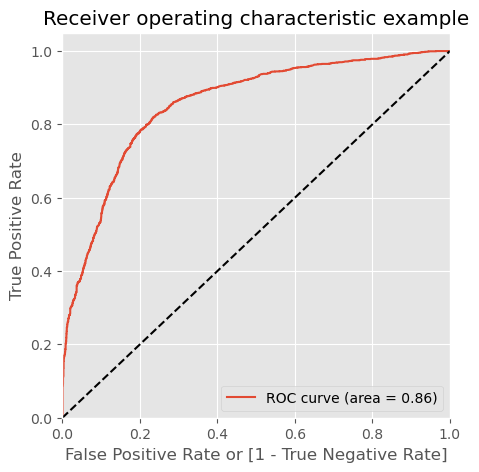

In [83]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

#### Step 17: Finding Optimal Cutoff Point

In [84]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.707539,7442,1,1,1,1,1,1,1,1,1,0,0
1,0,0.176305,6273,0,1,1,0,0,0,0,0,0,0,0
2,0,0.272823,6160,0,1,1,1,0,0,0,0,0,0,0
3,0,0.123619,609,0,1,1,0,0,0,0,0,0,0,0
4,1,0.927240,4543,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,specificity]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  specificity
0.0          0.0  0.438932     1.000000     0.000000
0.1          0.1  0.532347     0.980172     0.182006
0.2          0.2  0.692196     0.925314     0.509824
0.3          0.3  0.774296     0.862525     0.705274
0.4          0.4  0.791703     0.785856     0.796277
0.5          0.5  0.785901     0.713153     0.842813
0.6          0.6  0.769075     0.631196     0.876939
0.7          0.7  0.736873     0.514210     0.911065
0.8          0.8  0.700029     0.374752     0.954498
0.9          0.9  0.645489     0.204230     0.990693


#### Step 18: Plotting Accuracy, Sensitivity and Specificity for various probabilities.

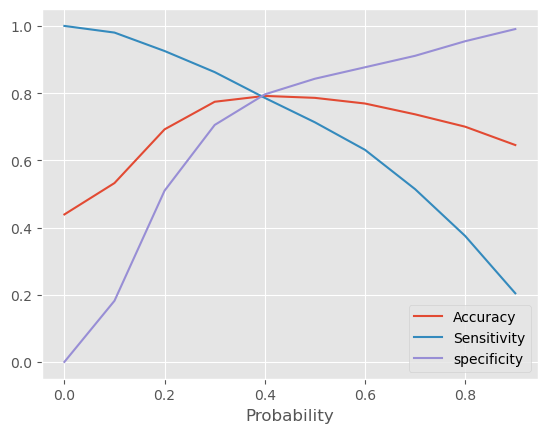

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','specificity'])
plt.show()

#### - From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [87]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.707539,7442,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.176305,6273,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.272823,6160,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.123619,609,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.927240,4543,1,1,1,1,1,1,1,1,1,1,1,1


#### Step 19: Precision and recall tradeoff

In [88]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

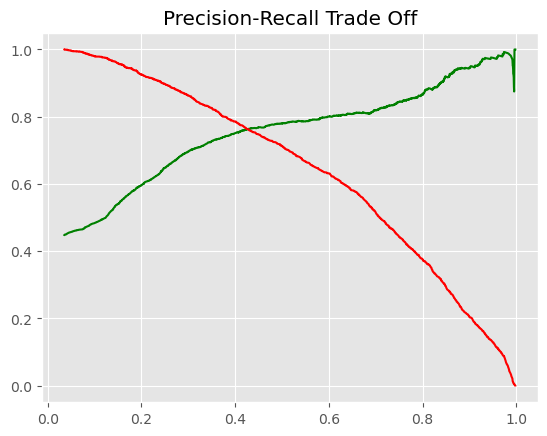

In [89]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision-Recall Trade Off");

#### Step 20: Making predictions on the test set

- In Senisitiy-Specificity-Accuracy curve 0.38 looks as the optimum cut-off point and in Precision recall curve 0.43 looks optimal
- We are taking 0.38 as optimal and cut off point and assigning Lead Score in Training Data

In [90]:

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(15)

,Convert,Convert_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.707539,7442,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.176305,6273,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.272823,6160,0,1,1,1,0,0,0,0,0,0,0,0,27
3,0,0.123619,609,0,1,1,0,0,0,0,0,0,0,0,0,12
4,1,0.927240,4543,1,1,1,1,1,1,1,1,1,1,1,1,93
5,0,0.237776,6886,0,1,1,1,0,0,0,0,0,0,0,0,24
6,1,0.205021,4635,0,1,1,1,0,0,0,0,0,0,0,0,21
7,0,0.147359,4475,0,1,1,0,0,0,0,0,0,0,0,0,15
8,0,0.206344,5305,0,1,1,1,0,0,0,0,0,0,0,0,21
9,0,0.397732,2742,0,1,1,1,1,0,0,0,0,0,0,1,40


In [91]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Final_Predicted )
print(confusion)

[[1514  420]
 [ 304 1209]]


In [92]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score:" , metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Final_Predicted))
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))
print("Precision Score : ", precision_score(y_train_pred_final.Convert, y_train_pred_final.Final_Predicted))
print("Recall Score : ", recall_score(y_train_pred_final.Convert, y_train_pred_final.Final_Predicted))

Accuracy Score: 0.789962286045837
Sensitivity : 0.799074686054197
Specificity : 0.7828335056876939
Precision Score :  0.7421731123388582
Recall Score :  0.799074686054197


In [93]:
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.707539,7442,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.176305,6273,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.272823,6160,0,1,1,1,0,0,0,0,0,0,0,0,27
3,0,0.123619,609,0,1,1,0,0,0,0,0,0,0,0,0,12
4,1,0.927240,4543,1,1,1,1,1,1,1,1,1,1,1,1,93


In [94]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Convert']==1,['Convert','Final_Predicted']]
checking_df['Final_Predicted'].value_counts()

1    1209
0     304
Name: Final_Predicted, dtype: int64

In [95]:
1209/(1209+304)

0.799074686054197

##### Final Prediction conversion  on train set is around 80% which is in line with the target

In [96]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [97]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4752,-0.706934,0,0,0,1,0,1,0,0,0
7268,1.396151,0,0,0,1,0,1,0,0,0
2815,0.458653,0,0,0,0,0,1,0,0,0
4532,1.719426,0,0,0,0,0,1,0,0,0
9198,-1.071517,0,0,0,0,0,1,0,0,0


In [98]:
X_test.describe()

,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,-0.018381,0.050068,0.031800,0.006089,0.324087,0.027064,0.869418,0.099459,0.302436,0.006089
std,0.986405,0.218158,0.175526,0.077822,0.468191,0.162324,0.337057,0.299378,0.459468,0.077822
min,-1.220582,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.888327,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-0.393537,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.812010,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,2.676679,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
X_test_sm = sm.add_constant(X_test)

In [100]:
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

4752    0.360614
7268    0.867562
2815    0.497768
4532    0.811712
9198    0.142686
2483    0.926815
7361    0.260400
4837    0.767673
1750    0.614999
6653    0.654713
dtype: float64

In [102]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4752,0.360614
7268,0.867562
2815,0.497768
4532,0.811712
9198,0.142686


In [103]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

y_test_df['Pros_ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [104]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Pros_ID,0
0,0,4752,0.360614
1,1,7268,0.867562
2,0,2815,0.497768
3,1,4532,0.811712
4,0,9198,0.142686


In [105]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Pros_ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Pros_ID,Converted,Converted_Prob
0,4752,0,0.360614
1,7268,1,0.867562
2,2815,0,0.497768
3,4532,1,0.811712
4,9198,0,0.142686


In [106]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.38

y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [107]:
y_pred_final.head()

,Pros_ID,Converted,Converted_Prob,Final_Predicted
0,4752,0,0.360614,0
1,7268,1,0.867562,1
2,2815,0,0.497768,1
3,4532,1,0.811712,1
4,9198,0,0.142686,0


In [108]:
# Now let us calculate the lead score

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Pros_ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,4752,0,0.360614,0,36
1,7268,1,0.867562,1,87
2,2815,0,0.497768,1,50
3,4532,1,0.811712,1,81
4,9198,0,0.142686,0,14
5,2483,1,0.926815,1,93
6,7361,1,0.260400,0,26
7,4837,1,0.767673,1,77
8,1750,0,0.614999,1,61
9,6653,1,0.654713,1,65


In [109]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_Predicted']]
checking_test_df['Final_Predicted'].value_counts()

1    529
0    136
Name: Final_Predicted, dtype: int64

In [110]:
529/(529+136)

0.7954887218045112

##### Final Prediction conversion  on test set is around 80%  which is in line with the target

In [111]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))


precision  0.7398601398601399
recall  0.7954887218045112


In [112]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7821380243572396

In [113]:
# Evaluating Model Performance on Test data
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
print(confusion)


[[627 186]
 [136 529]]


In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Accuracy Score:" , metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Calculate the specificity
print("Specificity :",TN / float(TN+FP))
#Precision Score
print("Precision Score : ", precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
#Recall Score
print("Recall Score : ", recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Accuracy Score: 0.7821380243572396
Sensitivity : 0.7954887218045112
Specificity : 0.7712177121771218
Precision Score :  0.7398601398601399
Recall Score :  0.7954887218045112


#### Step 21: Final Model Features

In [115]:
print("Features used in Final Model :", col)

print("**************************Feature Importance**************************")
sorted_params = res.params.sort_values(ascending=False)
print(sorted_params)

Features used in Final Model : Index(['Total Time Spent on Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')
**************************Feature Importance**************************
Last Notable Activity_Unreachable                       2.346566
Last Activity_Had a Phone Conversation                  2.312539
What is your current occupation_Working Professional    1.258886
Total Time Spent on Website                             1.166035
const                                                   1.015663
Last Activity_SMS Sent                                  0.795343
Last Notable Activity_Modified                         -0.5567

### Conclusion :-

- The Logistic regression model predicts the probability of the target variable having certain value. The cut off value is used to obtain predicted value of target variable.
- Optimum cut off value is selected at 0.38 , any lead with probability greater than 0.38 can be considered as Hot Lead and any lead with less than 0.38 probability can be considered as a Cold Lead.
- Final model has 10 features :- 'Total Time Spent on Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'
- Top 3 Factors are 
    - Last Notable Activity_Unreachable  with coefficient                      2.346566
    - Last Activity_Had a Phone Conversation   with coefficient                2.312539
    - What is your current occupation_Working Professional  with coefficient   1.258886

- Train
    Accuracy Score: 0.789962286045837
    Sensitivity : 0.799074686054197
    Specificity : 0.7828335056876939
    Precision Score :  0.7421731123388582
    Recall Score :  0.799074686054197


- Test
    Accuracy Score: 0.7821380243572396
    Sensitivity : 0.7954887218045112
    Specificity : 0.7712177121771218
    Precision Score :  0.7398601398601399
    Recall Score :  0.7954887218045112

- Accuracy, Sensitivity and Specificity values of test set are around 78%, 79% and 77% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 0.799074686054197 (train) / 0.7954887218045112 (test)
- Hence overall this model seems to be good.   
- The final model has Precision of 0.74, this means 74% of predicted hot leads are True Hot Leads.
- Final Prediction conversion on both train and test set is around 80%+ which is in line with the target

Thank you!!! Biji Krishna, Bappi Banik, Shantanu Biswas